<div style="text-align:right;">My First Neural Network in Tensorflow</div>
<div style="text-align:right;">Brickea with material from mofan python</div>

# My First Neural Network

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from matplotlib import pyplot as plt
%matplotlib

Instructions for updating:
non-resource variables are not supported in the long term
Using matplotlib backend: MacOSX


## Add Layer Function

神经层里常见的参数通常有weights、biases和激励函数。


In [84]:
#然后定义添加神经层的函数def add_layer(),它有四个参数：输入值、输入的大小、输出的大小和激励函数，我们设定默认的激励函数是None。
def add_layer(inputs,in_size,out_size,activation_function = None):
    # 接下来，我们开始定义weights和biases。
    # 因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。
    Weights = tf.Variable(tf.random.normal([in_size,out_size]))
    # 在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    # 下面，我们定义Wx_plus_b, 即神经网络未激活的值。其中，tf.matmul()是矩阵的乘法。
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # 当activation_function——激励函数为None时，输出就是当前的预测值——Wx_plus_b，不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。  
    outputs = Wx_plus_b
    if activation_function is not None:
        outputs = activation_function(Wx_plus_b)
    return outputs

### Use Data Test Add Layer Function

In [6]:
# Generate data
x_data = np.linspace(-1,1,300,dtype = np.float32)[:,np.newaxis] # 因为tf中运算需要用到矩阵类型的变量，所以在这里加一个维度，使其变成矩阵类型（在此处只有一个维度有数值，所以是Vector）
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) + 3 + noise

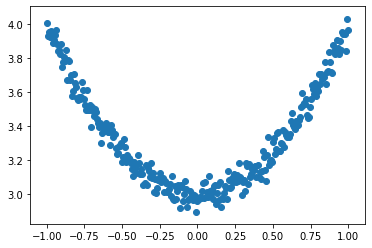

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ion()
ax.scatter(x_data, y_data)

利用占位符定义我们所需的神经网络的输入。 tf.placeholder()就是代表占位符，这里的None代表无论输入有多少都可以，因为输入只有一个特征，所以纵轴的数量是1。

In [87]:
x_input = tf.placeholder(tf.float32,[None,1])
y_output = tf.placeholder(tf.float32,[None,1])

接下来，我们就可以开始定义神经层了。 通常神经层都包括输入层、隐藏层和输出层。这里的输入层只有一个属性， 所以我们就只有一个输入；隐藏层我们可以自己假设，这里我们假设隐藏层有10个神经元； 输出层和输入层的结构是一样的，所以我们的输出层也是只有一层。 所以，我们构建的是——输入层1个、隐藏层10个、输出层1个的神经网络。

### Build Layers

下面，我们开始定义隐藏层,利用之前的add_layer()函数，这里使用 Tensorflow 自带的激励函数tf.nn.relu。

In [88]:
l1 = add_layer(x_input,1,10,activation_function=tf.nn.relu)

接着，定义输出层。此时的输入就是隐藏层的输出——l1，输入有10层（隐藏层的输出层），输出有1层。

In [89]:
predictions = add_layer(l1, 10, 1, activation_function=None)

计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。

In [90]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(predictions - y_data),reduction_indices=[1]))

接下来，是很关键的一步，如何让机器学习提升它的准确率。tf.train.GradientDescentOptimizer()中的值通常都小于1，这里取的是0.1，代表以0.1的效率来最小化误差loss。

In [91]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

### Train

In [92]:
init = tf.global_variables_initializer()

In [93]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(300):
        sess.run(train_step,feed_dict = {x_input:x_data,y_output:y_data})
        if i % 50 ==0:
            # Visualize the result
            print("loss: %f"% (sess.run(loss,feed_dict={x_input:x_data,y_output:y_data})))
            predictions_value = sess.run(predictions,feed_dict = {x_input:x_data,y_output:y_data})
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            lines = ax.plot(x_data,predictions_value,'r--',lw=5)
            plt.show()
            plt.pause(1)

loss: 1.254689
loss: 0.006339
loss: 0.005062
loss: 0.004368
loss: 0.003965
loss: 0.003709


## Speed Up Training - Optimizer

![](https://morvanzhou.github.io/static/results/ML-intro/speedup3.png)